In [1]:
import pathlib 
import os
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns 
%matplotlib inline 

In [ ]:
df = pd.read_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/raw/data.csv')

In [51]:
# scaling
# labelencoding
# splitting

def scale_label(df, scale = False):
    from sklearn.preprocessing import MinMaxScaler, LabelEncoder
    X = df.drop(['Districts'], axis = 1)
    y = df['Districts']
    if scale == False:
        le = LabelEncoder()
        ylabel = le.fit_transform(y)
        scaler = MinMaxScaler()
        Xlabel = scaler.fit_transform(X)
        dtf = pd.concat([pd.DataFrame(Xlabel), pd.DataFrame(ylabel)], axis = 1, join = 'inner')
    return dtf.to_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/interim/interim.csv', index = False)

In [52]:
scale_label(df)

In [8]:
data = pd.read_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/interim/interim.csv')

In [9]:
data

,0,1,2,0.1
0,0.534335,0.620523,0.617892,1
1,0.206009,0.320426,0.733131,2
2,0.239270,0.751210,0.653525,1
3,0.438841,0.775411,0.684610,1
4,0.331545,0.656341,0.620925,1
...,...,...,...,...
4495,0.157725,0.594385,0.830174,2
4496,0.586910,0.380445,0.136467,0
4497,0.909871,0.289448,0.070508,0
4498,0.567597,0.139400,0.254738,0


In [25]:
def component_no(data):
    """_summary_

    Args:
        data (_type_): _description_
    """
    # summarizing of data with multiple features are with covarience and correlation coefficient
    # for single variable the summaries are with mean, mode and standard deviations
    import matplotlib.pyplot as plt
    import pandas as pd 
    import numpy as np
    from sklearn.decomposition import PCA
    data = pd.read_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/interim/interim.csv')
    data = data.rename({'0':'water_prc', '1':'elect_prc', '2':'tel_prc', '0.1':'district'}, axis = 1)
    input = data.drop(['district'], axis = 1)
    pca = PCA().fit(input)
    plt.figure(figsize = (10, 4))
    components = np.arange(1, 4, 1)
    variance = np.cumsum(pca.explained_variance_ratio_)
    ylim = (0.0, 1.1)
    plt.plot(components, variance, marker = 'o', linestyle = '--', color = 'r')
    plt.xticks(np.arange(1, 4, step=1))
    # plt.xlabel(('Number of Components'))
    # plt.ylabel(str("% Cumulative Variance"))
    plt.axhline(y = 0.95, color = 'b', linestyle = '-')
    plt.text(0.5, 0.93, '95% Variane cut-off', color = 'r', fontsize = 10)
    return plt.show()
    
    

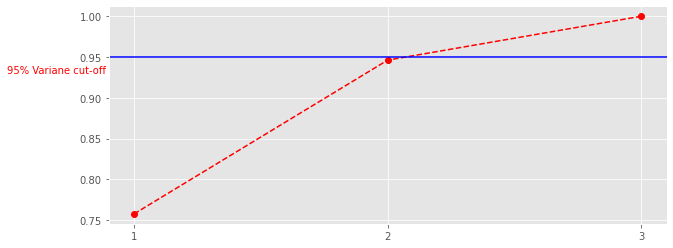

In [26]:
component_no(data =pd.read_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/interim/interim.csv'))

In [55]:
df = pd.read_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/interim/interim.csv')

In [60]:
print(df.columns)

Index(['0', '1', '2', '0.1'], dtype='object')


In [64]:
df

,water_prc,elect_prc,tel_prc,district
0,0.534335,0.620523,0.617892,1
1,0.206009,0.320426,0.733131,2
2,0.239270,0.751210,0.653525,1
3,0.438841,0.775411,0.684610,1
4,0.331545,0.656341,0.620925,1
...,...,...,...,...
4495,0.157725,0.594385,0.830174,2
4496,0.586910,0.380445,0.136467,0
4497,0.909871,0.289448,0.070508,0
4498,0.567597,0.139400,0.254738,0


In [67]:
def tr_ts(df, train_size = 0.8, test_size= 0.2):
    """_summary_

    Args:
        data (_type_): _description_
        train_size (_type_): _description_
        test_size (_type_): _description_
        stratify (_type_): _description_
    """
    from sklearn.model_selection import train_test_split
    df = pd.read_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/interim/interim.csv')
    df = df.rename({'0':'water_prc', '1':'elect_prc', '2':'tel_prc', '0.1':'district'}, axis = 1)
    X = df.drop(['district'], axis = 1)
    y = df['district']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= train_size, test_size = test_size,
                                                        stratify = y, random_state = 42)
    dtrain = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis = 1, join = 'inner')
    dtest = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis = 1, join = 'inner')
    train = dtrain.to_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/processed/train.csv', index = False)
    test = dtest.to_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/processed/test.csv', index = False)
    return train, test

In [68]:
tr_ts(df, train_size = 0.8, test_size= 0.2)

(None, None)

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color="red",
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [27]:
# first decide the number of pca components
# then do dimensionality reductiion 
# fitting and plotting of biplot
# deciding the number of cluster by using wcss
# pipeline creation for kmeans
# 
d = pd.read_csv("C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/processed/train.csv")
from sklearn.cluster import KMeans
def wccs(df, n_init = 10, plot=True):
    wcss = []
    for i in range(1, 10):
        km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=n_init, random_state=0)
        km.fit(df)
        wcss.append(km.inertia_)
    k = [i*100 for i in np.diff(wcss,2)].index(min([i*100 for i in np.diff(wcss,2)]))   
    if plot:
        fig, ax = plt.subplots()
        ax.plot(range(1, len(wcss)+1), wcss)
        ax.axvline(k, ls='--', color="red", label="k = "+str(k))
        ax.set(title='The Elbow Method', xlabel='Number of clusters', ylabel="Distortion")
        ax.legend()
        ax.grid(True)
        plt.show()
    return k

In [29]:
d = d.drop(['district'], axis = 1)
d

,water_prc,elect_prc,tel_prc
0,0.094421,0.492740,0.583776
1,0.464592,0.311713,0.194086
2,0.850858,0.232333,0.142532
3,0.199571,0.408519,0.650493
4,0.347639,0.662149,0.680061
...,...,...,...
3595,0.500000,0.683446,0.687642
3596,0.353004,0.438529,0.704321
3597,0.613734,0.228461,0.251706
3598,0.135193,0.606970,0.667172


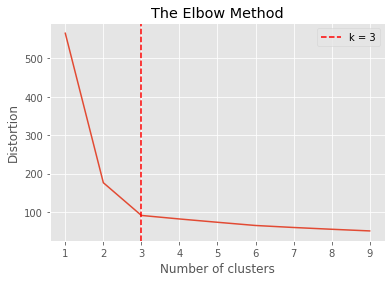

3

In [30]:
wccs(d)

In [34]:
def kmeans_pipe(k, component):
    """"""
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.decomposition import PCA
    from sklearn.pipeline import Pipeline
    preprocessor = Pipeline([('scaler', MinMaxScaler()), ("pca", PCA(n_components=component, random_state=42)),])
    clusterer = Pipeline([('kmeans', KMeans(n_clusters=k,init='k-means++', max_iter=300, n_init= 500, random_state=42,),),])
    return ((Pipeline([('preprocessor', preprocessor), ('clusterer', clusterer)])))

In [36]:
pipe = kmeans_pipe(3, 2)

In [37]:
pipe

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(n_clusters=3, n_init=500,
                                         random_state=42))]))])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
# def csv_reader(file_name):
#     file = open(file_name)
#     result = file.read().split("\n")
#     return result
"""import os

for i in range(n):
    # makeadir() evaluates your condition
    if makeadir(i):
        path = 'folder {}'.format(i)
        if not os.path.exists(path):
            os.mkdir(path)"""
"""import os

condition_success = 0 # set initial 0 
while True:
    condition_success += 1 # get counter for condition to increment if condition is true:
    # By default this will create folder within same directory
    os.makedirs("folder"+str(condition_success))"""

def scatter_images():
    img = 0
    while True:
        yield (img)
        img += 1
        OutPutPath= Path("C:/Users/miki/Desktop/VSML/cluster-machine-learning/reports/figures/") 
        scatterPath = str(img.png)
        file = Path.joinpath(OutPutPath, scatterPath)
        return open(file, 'wb').write(file.content)

        if not OutPutPath.exists():
            r = OutPutPath.touch(url, allow_redirects=True)
            open(OutPutPath, 'wb').write(r.content)
            print(f'File Created: {OutPutPath.name}')
        else:
            print('File Exists')

In [ ]:
df = pd.read_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/interim/interim.csv')

In [ ]:
df

,country,IS,IU_Per100,MCS_Per100,TEG
0,Burundi,0.0,5.0,122.0,2122.0
1,Comoros,0.0,29.0,188.0,654.0
2,Djibouti,11875.0,39.0,123.0,3927.0
3,Eritrea,7100.0,4.0,43.0,3967.0
4,Ethiopia,72422.0,5.0,101.0,90889.0
5,Kenya,12216.0,147.0,334.0,93074.0
6,Rwanda,16731.0,42.0,261.0,4710.0
7,Seychelles,7920.0,225.0,718.0,4262.0
8,Somalia,0.0,3.0,116.0,3706.0
9,South Sudan,0.0,39.0,109.0,3958.0


In [ ]:
def scatterplot(df, x: str, y: str, outPutPath: str = "."):
    """ Function to create the scatter plot for our dataframe including the
    directory to save the images from the outputs of scatter function  
    =============================================================
    ARGUMENTS
    =============================================================
    df ([type]): our input dataframe 
    x (str): the featrure in the x axis
    y (str): the feature in the y axis
    outPutPath (str): our output directory
    =============================================================
    RETURNS: the saved scatterplot images in our working environment
    =============================================================
    """
    if not os.path.exists(outPutPath):
        os.makedirs(outPutPath)
    else:
        print("Directory already exists")
    Scatter = ("C:/Users/miki/Desktop/VSML/cluster-machine-learning/reports/figures/ScatterPlots")
    outPuts = os.path.join(outPutPath, Scatter)
    fig, ax = plt.subplots(figsize= (14, 9))
    graph = sns.scatterplot(ax=ax, x=x, y=y, data=df, s=325, alpha=0.5, hue="country")
    box = ax.get_position()
    plt.legend(markerscale=2)
    img = os.path.join(outPuts, "{}v{}.png".format(x, y))
    plt.savefig(img)
    plt.show()
    return img

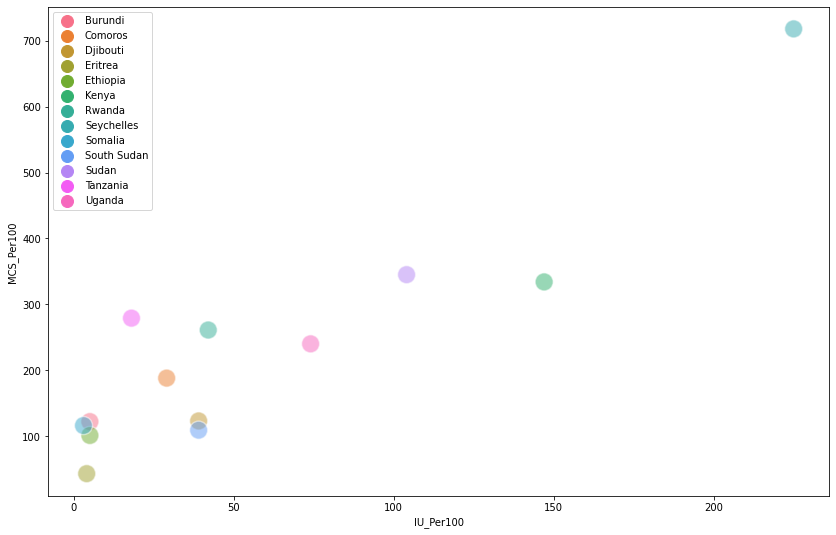

'C:/Users/miki/Desktop/VSML/cluster-machine-learning/reports/figures/ScatterPlots\\IU_Per100vMCS_Per100.png'

In [ ]:
scatterplot(df, x='IU_Per100',y ='MCS_Per100', outPutPath=("C:/Users/miki/Desktop/VSML/cluster-machine-learning/reports/figures/ScatterPlots") )

In [ ]:
def histogram(df, x, outPutPath: str = "."):
    """ 
    Function to create the summary statistics histogram plots for 
    our input dataframe and save the results into the figure output
    paths
    Args:
        df(dataframe): input data
        x (int or float): Dataframe features
        outPutPath (str): _description_
    return:
        Histogram plot
    """
    
    HistoGramPlot = ("C:/Users/miki/Desktop/VSML/cluster-machine-learning/reports/figures/HistoGram")
    if not os.path.exists(outPutPath):
        os.makedirs(outPutPath)
    else:
        print("Directory already exists")
    result = os.path.join(outPutPath, HistoGramPlot)
    if x.dtype == 'int64' or x.dtype == 'float64':
        output = sns.displot(data=df, x=x, bins = 10, kind='hist',hue_norm=None, kde = True, color=None, col_wrap=None,height=5, aspect=1, facet_kws=None)
        y = plt.ylabel('Frequency', size = 17)
        plt.grid = False
        plt.xticks(size = 17)
        plt.yticks(size = 17)
        plt.title(x.name, size = 19) 
        img = os.path.join(result, "{}v{}.png".format(x, y))
        plt.savefig('C:/Users/miki/Desktop/VSML/cluster-machine-learning/reports/figures/HistoGramPlot/img.png')
        return img

Directory already exists


"C:/Users/miki/Desktop/VSML/cluster-machine-learning/reports/figures/HistoGram\\0     122.0\n1     188.0\n2     123.0\n3      43.0\n4     101.0\n5     334.0\n6     261.0\n7     718.0\n8     116.0\n9     109.0\n10    345.0\n11    279.0\n12    240.0\nName: MCS_Per100, dtype: float64vText(6.674999999999997, 0.5, 'Frequency').png"

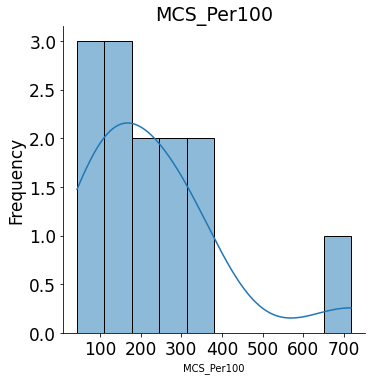

In [ ]:
histogram(df, df['MCS_Per100'], outPutPath=("C:/Users/miki/Desktop/VSML/cluster-machine-learning/reports/figures/HistoGramPlot"))

In [ ]:
def pairplot(data, OutPutPath: str = '.'):
    """Function to create the scatter plot for the comparison of 
    numerical variables with that of non numerical categorical variables
    and we use the nominal variable as hue to so as to depict the difference
    between countries in indicators 

    Args:
        data (pandas dataframe): _description_
    """
    if not os.path.exists(OutPutPath):
        os.makedirs(OutPutPath)
    else:
        print("Directory already exists")
    PairPlot = ("C:/Users/miki/Desktop/VSML/cluster-machine-learning/reports/figures/PairPlots")
    outputs = os.path.join(OutPutPath, PairPlot)
    graph = sns.pairplot(data = df,  x_vars=["IS", "IU_Per100", "MCS_Per100", "TEG"],
                         y_vars=["IS", "IU_Per100", "MCS_Per100", "TEG"], hue="country", kind = 'scatter')
    fig = os.path.join(outputs, "{}.png".format(graph))
    graph.figure.savefig("C:/Users/miki/Desktop/VSML/cluster-machine-learning/reports/figures/PairPlots/pairplot.png")
    return fig